In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset


# Load data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()


# Data cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)

In [2]:
import seaborn as sns

In [3]:
# Only get Data Analyst jobs in the US
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

In [4]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US['job_skills']

109        python
109             r
109       alteryx
109       tableau
180         excel
           ...   
784882        sql
784882        vba
784882    tableau
784882      excel
784882    alteryx
Name: job_skills, Length: 17440, dtype: object

In [5]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = (df_DA_US_group.sort_values(by='median', ascending=False).head(10))

df_DA_top_skills = (df_DA_US_group.sort_values(by='count', ascending=False).head(10))
df_DA_top_skills


,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
order_top_pay = df_DA_top_pay.sort_values('median', ascending=False).index
order_top_skills = df_DA_top_skills.sort_values('median', ascending=False).index


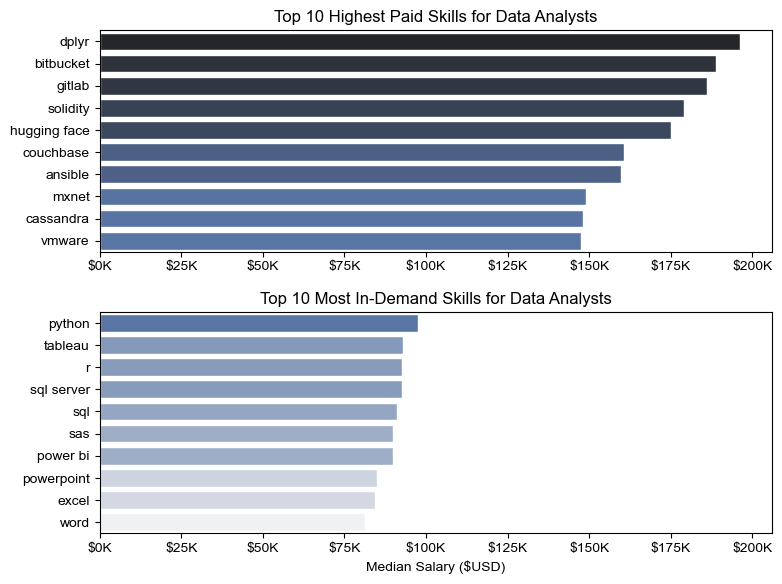

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

sns.set_theme(style="ticks")

# --- Top 10 Highest Paid Skills ---
sns.barplot(
    data=df_DA_top_pay,
    x='median',
    y=df_DA_top_pay.index,
    order=order_top_pay,
    ax=ax[0],
    hue='median',
    palette='dark:b_r'
)
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
)

# --- Top 10 Most In-Demand Skills ---
sns.barplot(
    data=df_DA_top_skills,
    x='median',
    y=df_DA_top_skills.index,
    order=order_top_skills,
    ax=ax[1],
    hue='median',
    palette='light:b'
)
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
)

fig.tight_layout()
plt.show()



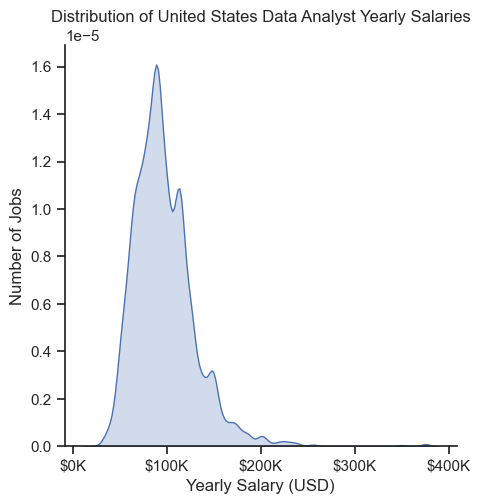

In [9]:
sns.set_theme(style="ticks")

sns.displot(
    df_DA_US['salary_year_avg'],
    kind='kde',
    fill=True
)

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')

ax = plt.gca()
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
)

plt.show()



In [11]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US =df_US.dropna(subset=['salary_year_avg'])

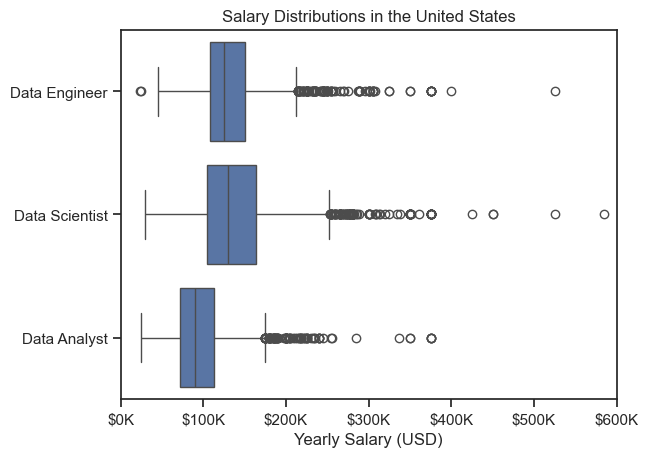

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks")

sns.boxplot(data=df_US, x="salary_year_avg",  y="job_title_short")

plt.title("Salary Distributions in the United States")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
plt.xlim(0, 600000)

ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()


<Axes: xlabel='salary_year_avg'>

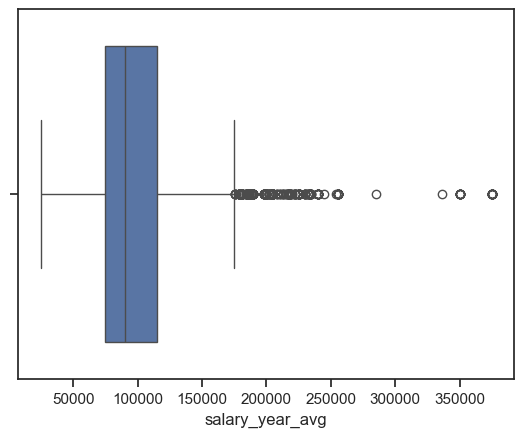

In [10]:
sns.boxplot(
    data=df_DA_US,
    x='salary_year_avg'
)


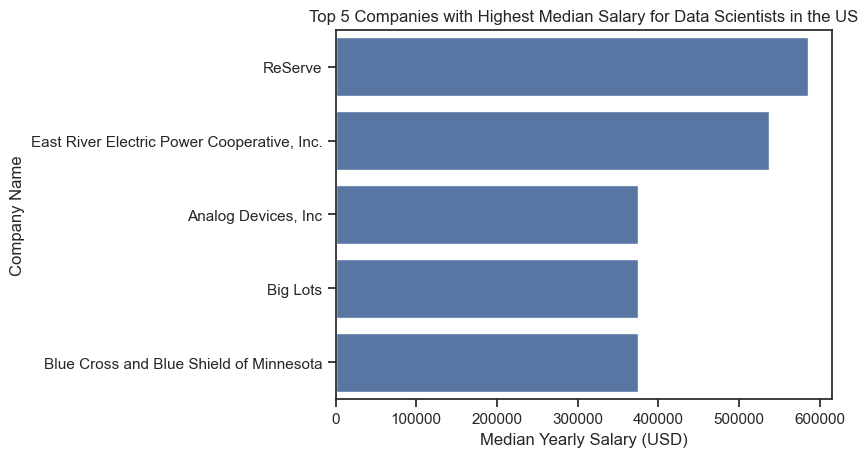

In [15]:
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=top_companies, x='salary_year_avg', y='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

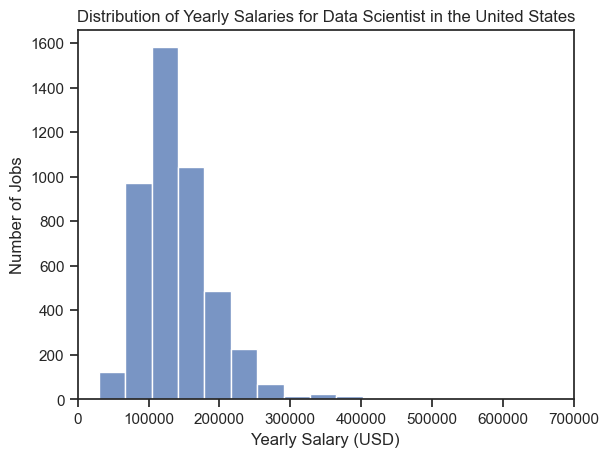

In [16]:
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Filter for Data Scientist job postings in the United States
us_ds_jobs = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].copy()

# Drop NaN values from the 'salary_year_avg' column
us_ds_jobs = us_ds_jobs.dropna(subset=['salary_year_avg'])

# Plot histogram for yearly average salary
sns.histplot(us_ds_jobs['salary_year_avg'], bins=25, kde=False)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0,700000)
plt.show()

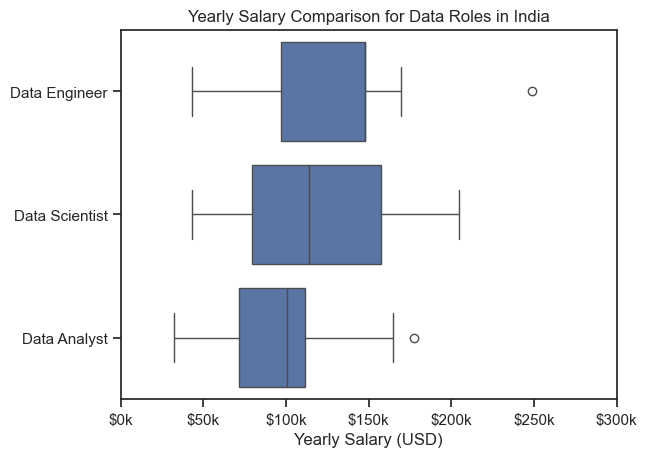

In [17]:
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Filter for Data Analyst, Data Engineer, and Data Scientist job postings in India
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
india_jobs = df[(df['job_country'] == 'India') & (df['job_title_short'].isin(job_titles))]

# Drop NaN values from the 'salary_year_avg' column
india_jobs = india_jobs.dropna(subset=['salary_year_avg'])

# Plot box plot for yearly average salary
sns.boxplot(data=india_jobs, x='salary_year_avg', y='job_title_short')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()

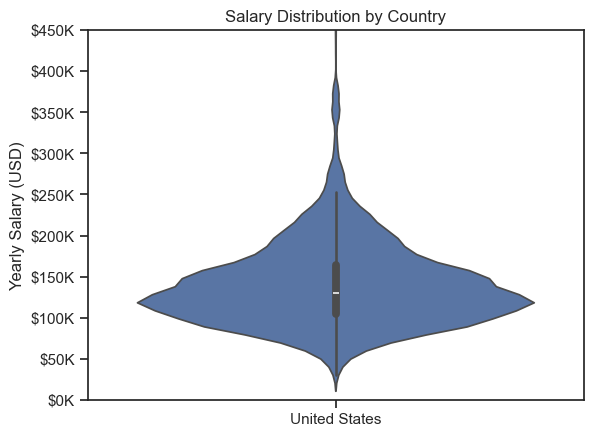

In [18]:
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Filter the DataFrame for Data Scientist job postings in the United States
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])
# Plot chart
sns.violinplot(x='job_country', y='salary_year_avg', data=df_DS_US)
plt.title('Salary Distribution by Country')
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)')
plt.ylim(0, 450000)  
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()